In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import load_digits

In [3]:
df=load_digits()

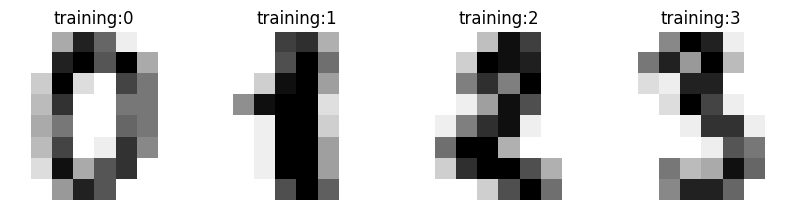

In [7]:
_, axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax , image , label in zip(axes,df.images,df.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    ax.set_title('training:%i'%label)

In [8]:
df.images.shape

(1797, 8, 8)

In [9]:
df.images[0].shape

(8, 8)

In [10]:
len(df.images)

1797

In [11]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [12]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [13]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [14]:
data[0].shape

(64,)

In [15]:
data.shape

(1797, 64)

In [16]:
data.min()

0.0

In [17]:
data.max()

16.0

In [18]:
data=data/16

In [19]:
data.min()

0.0

In [20]:
data.max()

1.0

In [21]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(data,df.target,test_size=0.2)

In [26]:
X_train.shape , X_test.shape,y_train.shape,y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf=RandomForestClassifier()

In [29]:
rf.fit(X_train,y_train)


RandomForestClassifier()

In [30]:
y_pred=rf.predict(X_test)

In [31]:
y_pred

array([9, 9, 9, 1, 6, 5, 5, 9, 5, 8, 6, 5, 4, 4, 7, 1, 3, 8, 3, 6, 1, 6,
       4, 0, 4, 9, 3, 9, 0, 2, 7, 5, 1, 3, 4, 8, 8, 1, 3, 6, 8, 3, 6, 6,
       8, 5, 4, 8, 3, 5, 8, 4, 4, 4, 9, 2, 6, 0, 6, 5, 7, 2, 6, 0, 6, 1,
       8, 5, 8, 7, 0, 2, 3, 2, 7, 7, 5, 9, 3, 6, 9, 7, 1, 3, 7, 2, 2, 9,
       9, 6, 4, 0, 9, 4, 8, 2, 5, 9, 0, 4, 2, 8, 0, 1, 8, 4, 1, 5, 3, 8,
       6, 0, 1, 8, 7, 3, 6, 5, 9, 1, 8, 4, 7, 4, 4, 9, 3, 2, 9, 5, 0, 5,
       8, 3, 6, 3, 3, 4, 2, 6, 0, 0, 0, 2, 3, 6, 3, 9, 9, 6, 2, 3, 8, 0,
       9, 4, 4, 0, 0, 6, 7, 0, 0, 5, 6, 9, 1, 0, 5, 3, 4, 6, 6, 4, 5, 3,
       0, 4, 7, 8, 4, 8, 9, 5, 7, 4, 3, 3, 0, 4, 7, 1, 1, 4, 1, 2, 1, 8,
       7, 5, 2, 9, 8, 0, 3, 3, 7, 9, 1, 7, 2, 2, 6, 5, 5, 8, 0, 1, 6, 1,
       6, 5, 2, 4, 9, 1, 5, 3, 7, 3, 6, 6, 5, 5, 1, 5, 8, 8, 6, 9, 3, 9,
       1, 0, 6, 5, 5, 2, 9, 4, 8, 3, 1, 4, 8, 6, 8, 3, 4, 3, 2, 1, 8, 5,
       3, 4, 3, 9, 7, 1, 5, 6, 8, 3, 9, 2, 3, 9, 3, 3, 6, 2, 6, 2, 5, 5,
       2, 8, 6, 8, 5, 4, 6, 0, 9, 7, 2, 7, 7, 8, 2,

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
confusion_matrix(y_test,y_pred)

array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  1, 41,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 25,  0,  1],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 35]])

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.94      1.00      0.97        30
           2       1.00      1.00      1.00        33
           3       0.98      1.00      0.99        41
           4       0.97      1.00      0.99        38
           5       0.97      0.97      0.97        38
           6       1.00      0.95      0.98        43
           7       1.00      0.96      0.98        26
           8       0.98      0.95      0.96        42
           9       0.95      0.97      0.96        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

